<a href="https://colab.research.google.com/github/Bhaviya22/ML-projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

**train_images=x_train ,train_labels=y_train**

**/255.0=converting  to grey scale (changing color channel)**

In [ ]:
(train_images,train_lables),(test_images,test_labels)=datasets.cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 0, 'deer')

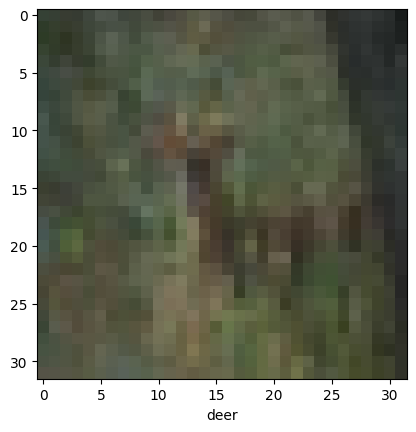

In [ ]:
plt.imshow(train_images[10])
plt.xlabel(class_names[train_lables[10][0]])

**32,64-no of filters **

**3,3->filters size**

**2,2->pooling size**

**input shape (32,32,3)-> **
3-means rbg color channel

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_lables,validation_split=0.1,epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.1260 - loss: 3.7083 - val_accuracy: 0.0976 - val_loss: 3.3745
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.0959 - loss: 3.3153 - val_accuracy: 0.0950 - val_loss: 3.5057
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.1035 - loss: 3.9794 - val_accuracy: 0.0970 - val_loss: 4.6025
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.1003 - loss: 4.2645 - val_accuracy: 0.0976 - val_loss: 3.9122
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.0995 - loss: 3.7761 - val_accuracy: 0.0974 - val_loss: 3.9122


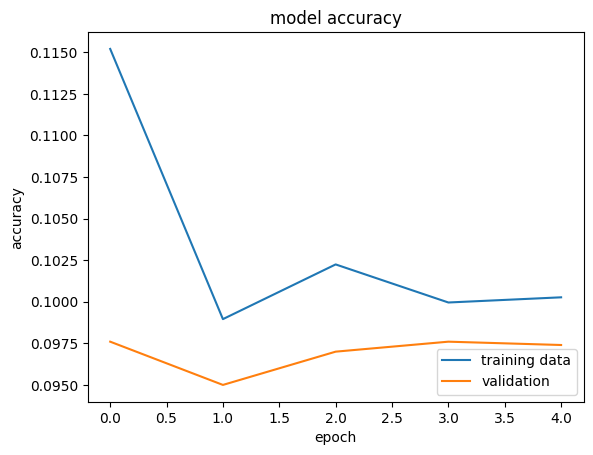

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training data','validation'],loc='lower right')


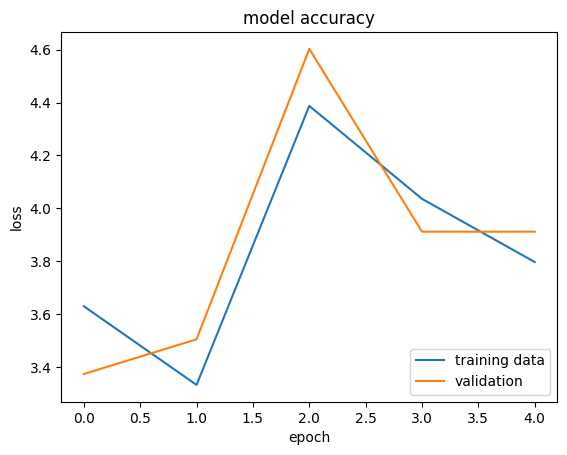

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training data','validation'],loc='lower right')

In [ ]:
tf.keras.models.save_model(model,'model.hdf5')

In [ ]:
y_predict =model.predict(test_images)
print(y_predict)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
[[ 3.8626378  2.8722355  3.5031497 ...  4.454805  -4.9855733  5.596413 ]
 [ 5.0833974  3.9451983  4.276847  ...  5.736978  -6.5812454  6.9096274]
 [ 4.3527412  3.2635865  3.719168  ...  4.9720883 -5.5861125  6.066121 ]
 ...
 [ 3.0255508  2.1406288  2.8688927 ...  3.747644  -3.8065689  4.50045  ]
 [ 4.40218    3.2045896  4.0196686 ...  5.15222   -5.6059985  6.4000688]
 [ 3.3999918  2.5624316  2.9983354 ...  4.0043974 -4.3751016  4.836033 ]]


In [ ]:
y_predict1=np.argmax(y_predict,axis=1)
y_predict1[24]

np.int64(6)

In [ ]:
test_labels[24]

array([5], dtype=uint8)

Text(0.5, 1.0, 'y_test:[5],y_predict1:6')

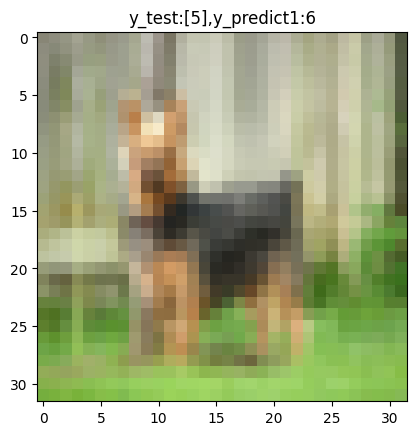

In [ ]:
plt.imshow(test_images[24])
plt.title(f"y_test:{test_labels[24]},y_predict1:{y_predict1[24]}")
